In [32]:
import pandas as pd

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
t = go.layout.Template(
    layout=go.Layout(
        hovermode='x'
    )
)
t.data.scatter = [
    go.Scatter(hoverlabel=go.scatter.Hoverlabel(namelength=-1))
]
t.data.bar = [
    go.Bar(hoverlabel=go.bar.Hoverlabel(namelength=-1))
]
pio.templates["my"] = t
pio.templates.default = "plotly_dark+my"

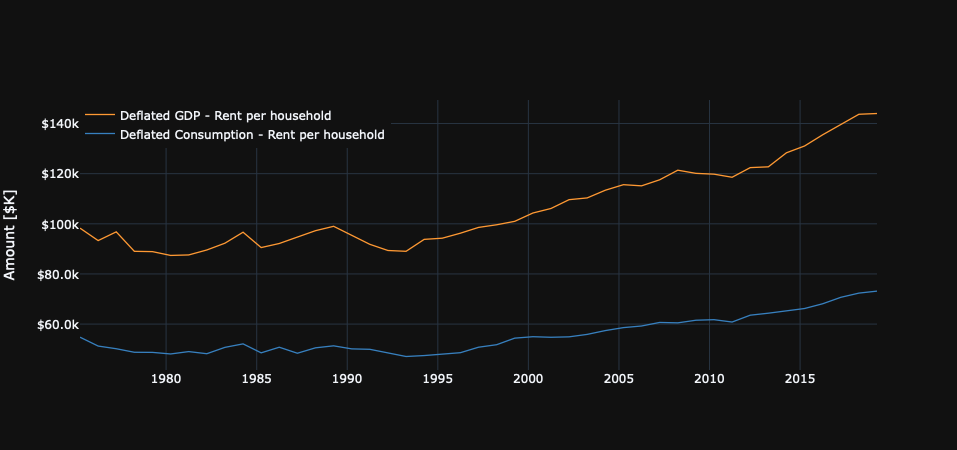

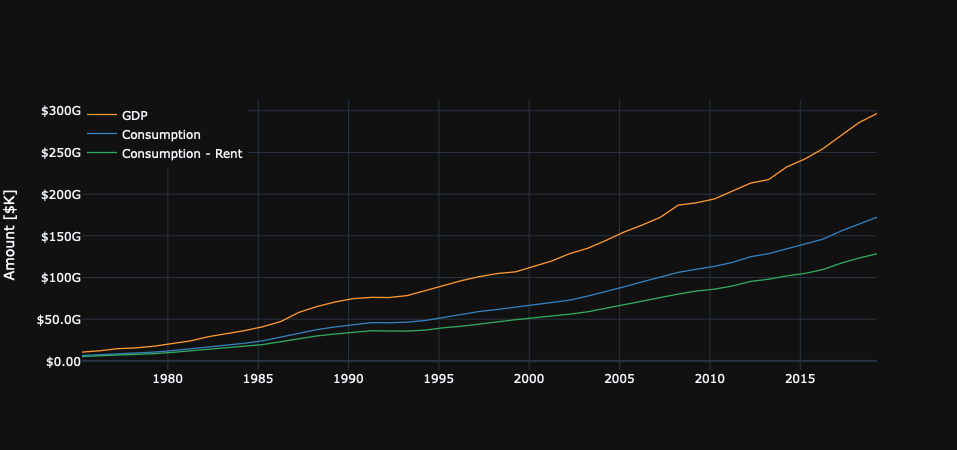

In [17]:
gdp = pd.read_csv('out/gen/gdp_1860-now.csv', parse_dates=True, index_col=0)
gdp['Deflated GDP - Rent per household'] = (gdp['GDP'] - gdp['Rent'])/gdp.Deflator/gdp['Occupied Dwellings']
gdp['Deflated Consumption - Rent per household'] = (gdp['Consumption'] - gdp['Rent'])/gdp.Deflator/gdp['Occupied Dwellings']

gdp[['Deflated GDP - Rent per household', 'Deflated Consumption - Rent per household']].dropna().iplot(
    layout=go.Layout(
        yaxis=go.layout.YAxis(title="Amount [$K]", tickformat="$.3s"),
        legend = go.layout.Legend(x=0)
    )
)

gdp['Consumption - Rent'] = (gdp['Consumption'] - gdp['Rent'])
gdp[['GDP', 'Consumption', 'Consumption - Rent']].dropna().iplot(
    layout=go.Layout(
        yaxis=go.layout.YAxis(title="Amount [$K]", tickformat="$.3s"),
        legend = go.layout.Legend(x=0)
    )
)




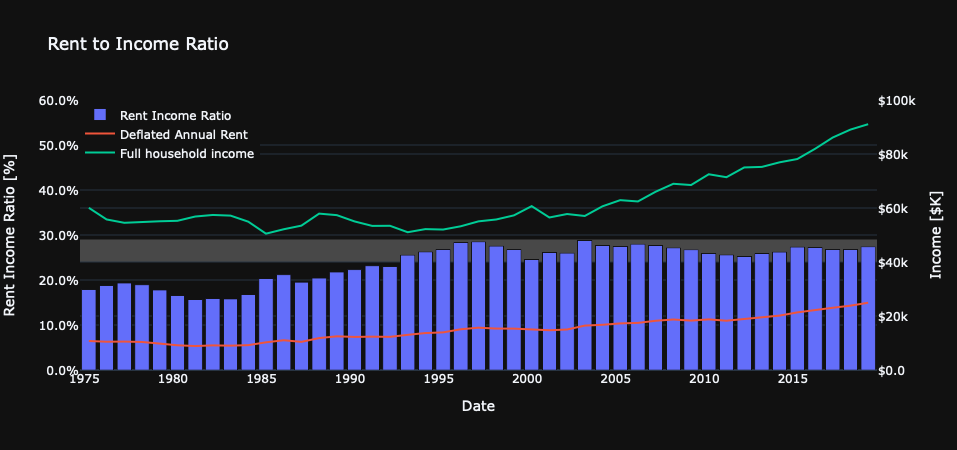

In [46]:
income = pd.read_csv('out/gen/income_stats-nz_1972-now.csv', parse_dates=True, index_col=0)
income['Deflated Household Income'] = income['Deflated Income']/income['Occupied Dwellings']
income['Deflated Household Salaries'] = income['Deflated Salaries']/income['Occupied Dwellings']
income['Deflated Rent'] = income['Deflated Rent']*365/7
income['Household Income - Rent'] = income['Deflated Household Income'] - income['Deflated Rent']
income['Rent Income Ratio'] = income['Deflated Rent']/income['Deflated Household Income'] 

df = income.dropna()
#income[['Deflated Household Salaries', 'Deflated Household Income']].dropna().iplot(
#    layout=go.Layout(
#        yaxis=go.layout.YAxis(title="Amount [$K]", tickformat="$.3s"),
#        legend = go.layout.Legend(x=0)
#    )
#)


#income[['Household Income - Rent', 'Deflated Household Income']].dropna().iplot(
#    layout=go.Layout(
#        yaxis=go.layout.YAxis(title="Amount [$K]", tickformat="$.3s"),
#        legend = go.layout.Legend(x=0)
#    )
#)

#income[['Rent ratio']].dropna().iplot(
#    layout=go.Layout(
#        yaxis=go.layout.YAxis(title="Amount [$K]", tickformat="%"),
#        legend = go.layout.Legend(x=0)
#    )
#)

fig = go.Figure(
 data = [
     go.Bar(x=df.index, y=df["Rent Income Ratio"], 
                name="Rent Income Ratio"),

     go.Scatter(x=df.index, y=df["Deflated Rent"], 
                name="Deflated Annual Rent", yaxis="y2"),#, fill="tozeroy"),
     #go.Scatter(x=df.index, y=df["Deflated Household Salaries"], 
     #           name="Deflated Household Salaries", fill="tonexty"),
     go.Scatter(x=df.index, y=df["Deflated Household Income"], 
                name="Full household income", yaxis="y2")#, fill="tonexty"),
          
 ],
 layout=go.Layout(
    title='Rent to Income Ratio',
    xaxis=go.layout.XAxis(title = "Date"),
    yaxis2=go.layout.YAxis(title="Income [$K]", overlaying='y', side='right', tickformat="$.2s", range=[0,100000]),
    yaxis=go.layout.YAxis(title="Rent Income Ratio [%]", tickformat=".1%", range=[0,0.6]),
    legend = go.layout.Legend(x=0, y=1),
    shapes = [
         go.layout.Shape(type="rect",x0=0, y0=0.24, x1=1, y1=0.29,
            line_width=0, layer='below', fillcolor="rgba(128, 128, 128, 0.5)",
                         xref="paper"
        )
     ],
))
fig.show()
